# A VERY BASIC RECOMMENDATION SYSTEM

A recommender system is a simple algorithm whose aim is to provide the most relevant information to a user by discovering patterns in a dataset. The algorithm rates the items and shows the user the items that they would rate highly. An example of recommendation in action is when you visit Amazon and you notice that some items are being recommended to you or when Netflix recommends certain movies to you. They are also used by Music streaming applications such as Spotify and Deezer to recommend music that you might like.

Importing all the neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
column_names=['user_id','item_id','rating','timestamp']

In [3]:
df=pd.read_csv('u.data',sep='\t',names=column_names,)

In [4]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
movie_titles=pd.read_csv('Movie_Id_Titles')

In [6]:
df=pd.merge(df,movie_titles,on='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

The above step has been done to get to know the average rating which each movie got.

In [9]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

You might be wondering why do we need to count the number of reviws which each movie got.This is because it might happen that a movie is rated as 5-star but it is watched only by one person,that's why we take into consideration of the number of reviews for each movie.

Next we store these values in a form of dataset for a much more clear view.

In [10]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [11]:
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In order to store the ratings and the number of ratings in a single dataset we use the groupby function.

In [12]:
ratings['num_ratings']=df.groupby('title')['rating'].count()

In [13]:
ratings.head()

,rating,num_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Now in order to get a much more clear picture about the dataset we perform data analysis by plotting histograms.

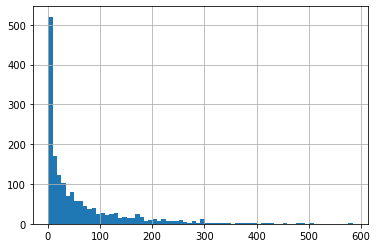

In [14]:
ratings['num_ratings'].hist(bins=70)

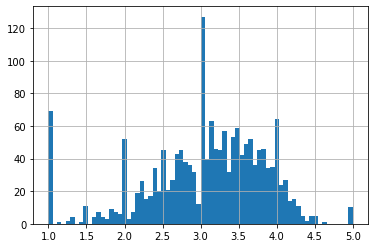

In [15]:
ratings['rating'].hist(bins=70)

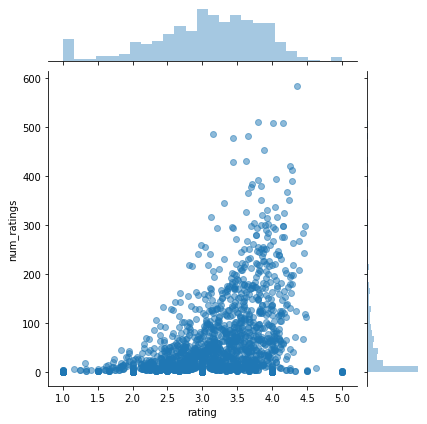

In [16]:
sns.jointplot(x='rating',y='num_ratings',data=ratings,alpha=0.5)

From the above graph we get to know that as the ratings of any movie increases the number of people who have watched that movie also increased which is obvious as most people prefer to watch those movies which are highly rated by other people.

In [17]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


We create a pivot table which contains the user id as index and title of the movies as column name.The data is the rating given by each user to each movie 

In [18]:
movie_mat=df.pivot_table(index='user_id',columns='title',values='rating')

In [19]:
movie_mat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ratings.sort_values('num_ratings',ascending=False).head(10)

,rating,num_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [21]:
ratings.head()

,rating,num_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


We select any two movies as refernce to see which movies are similar to each of these two.I have taken 
starwars and liar liar as refernce but you can change as per your wish

In [22]:
starwars_user_ratings=movie_mat['Star Wars (1977)']
liarliar_user_ratings=movie_mat['Liar Liar (1997)']

In [23]:
starwars_user_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

Pairwise correlation is computed between rows or columns of DataFrame with rows or columns of Series or DataFrame. 

In [24]:
similar_to_starwars=movie_mat.corrwith(starwars_user_ratings)

/Users/chunky/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/chunky/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [25]:
similar_to_liarliar=movie_mat.corrwith(liarliar_user_ratings)

In [26]:
corr_starwars=pd.DataFrame(similar_to_starwars,columns=['Correlation'])
corr_starwars.dropna(inplace=True)

In [27]:
corr_starwars

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
...,...
Young Guns (1988),0.186377
Young Guns II (1990),0.228615
"Young Poisoner's Handbook, The (1995)",-0.007374


This table tells us how correlated a movie's user ratings were similar to the user ratings of the star war's movie

In [28]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


These movies are unheard and using them makes no sense as these movies were seen by very few people who happend to rate starwars also as 5

In order to fix this we can create a threshold on the number of people who have seen a particular movie.In this 
example we have taken threshold as 100 but it can be pretty interesting if we try to experimnet by changing this value

In [29]:
corr_starwars=corr_starwars.join(ratings['num_ratings'])

In [30]:
corr_starwars.head()

,Correlation,num_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [31]:
corr_starwars[corr_starwars['num_ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


The most similar movie to starwars is Empire Strikes Back,The(1980) hence we would recommend this movie to the viewers who liked watching starwars

In [32]:
corr_liarliar=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [33]:
corr_liarliar

,Correlation
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145
...,...
Young Guns II (1990),0.352174
"Young Poisoner's Handbook, The (1995)",0.445016
Zeus and Roxanne (1997),-0.500000


In [34]:
corr_liarliar.dropna(inplace=True)

In [35]:
corr_liarliar.sort_values('Correlation',ascending=False)

,Correlation
title,
"Bonheur, Le (1965)",1.0
For Ever Mozart (1996),1.0
Crossfire (1947),1.0
Johnny 100 Pesos (1993),1.0
Moonlight and Valentino (1995),1.0
...,...
Aparajito (1956),-1.0
"Quiet Room, The (1996)",-1.0
Germinal (1993),-1.0


This table tells us how correlated a movie's user ratings were similar to the user ratings of the liar liar's movie

In [36]:
corr_liarliar=corr_liarliar.join(ratings['num_ratings'])

In [37]:
corr_liarliar[corr_liarliar['num_ratings']>100].sort_values('Correlation',ascending=False).head(10)

,Correlation,num_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102


The most similar movie to starwars is Batman Forever hence we would recommend this movie to the viewers who liked liar liar.

Obviously this is a very simple way of building recommender system and is no where close to industry standards.